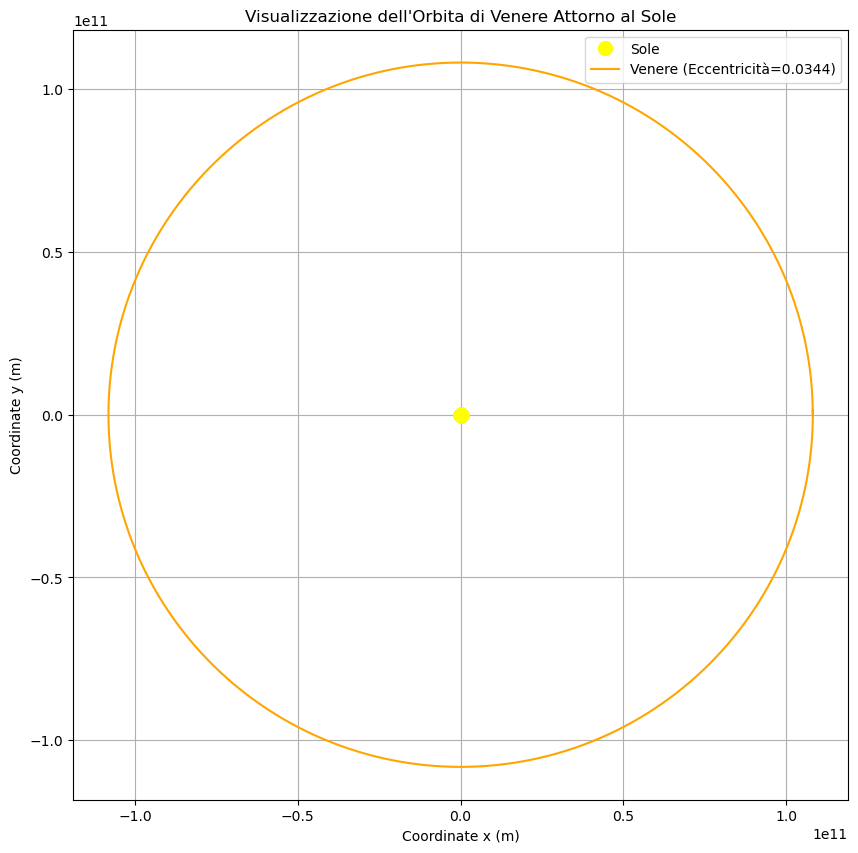

In [1]:
#Assignment1.py
# %%
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# Costanti
G = 6.67408e-11  # Costante gravitazionale universale, N-m2/kg2
M_sun = 1.989e+30  # Massa del Sole, kg
M_venus = 4.8675e+24  # Massa di Venere, kg

# Condizioni iniziali per Venere e il Sole
r_venus = np.array([108.21e9, 0])  # Posizione iniziale di Venere (vicino al perielio), m
v_venus = np.array([0, 35.02e3])  # Velocità iniziale di Venere, m/s
r_sun = np.array([0, 0])  # Il Sole rimane all'origine
v_sun = np.array([0, 0])  # Velocità iniziale del Sole

# Convertiamo i vettori di posizione in array e troviamo il baricentro
r_com = (M_venus * r_venus + M_sun * r_sun) / (M_venus + M_sun)

# Equazioni di moto per il problema a due corpi
def EquazioniDueCorpi(w, t, G, m1, m2):
    r1 = w[:2]
    r2 = w[2:4]
    v1 = w[4:6]
    v2 = w[6:8]
    r = np.linalg.norm(r2 - r1)
    dv1bydt = G * m2 * (r2 - r1) / r**3
    dv2bydt = G * m1 * (r1 - r2) / r**3
    dr1bydt = v1
    dr2bydt = v2
    derivs = np.concatenate((dr1bydt, dr2bydt, dv1bydt, dv2bydt))
    return derivs

# Convertiamo l'array delle condizioni iniziali in una lista
init_params = np.array([r_sun, r_venus, v_sun, v_venus])
init_params = init_params.flatten()

# Intervallo di tempo della simulazione (un anno veneziano ~ 225 giorni terrestri)
t = np.linspace(0, 225*24*3600, 1000)

# Risolviamo le equazioni differenziali
sol_due_corpi = odeint(EquazioniDueCorpi, init_params, t, args=(G, M_sun, M_venus))

# Estraiamo le posizioni di Venere e del Sole
r_sun_sol = sol_due_corpi[:, :2]
r_venus_sol = sol_due_corpi[:, 2:4]

# Calcoliamo l'estensione massima dell'orbita di Venere per impostare i limiti del grafico
max_distance = np.max(np.linalg.norm(r_venus_sol, axis=1))

# Calcoliamo l'eccentricità
a = np.max(np.linalg.norm(r_venus_sol, axis=1))  # Semiasse maggiore
b = np.min(np.linalg.norm(r_venus_sol, axis=1))  # Semiasse minore
eccentricità = np.sqrt(1 - (b**2 / a**2))

# Grafichiamo le orbite di Venere e del Sole
plt.figure(figsize=(10, 10))
plt.plot(r_sun_sol[:, 0], r_sun_sol[:, 1], 'o', label='Sole', markersize=10, color='yellow', zorder=5)  # Sole come un punto giallo
plt.plot(r_venus_sol[:, 0], r_venus_sol[:, 1], label=f'Venere (Eccentricità={eccentricità:.4f})', color='orange')  # Orbita di Venere
plt.xlabel('Coordinate x (m)')
plt.ylabel('Coordinate y (m)')
plt.title('Visualizzazione dell\'Orbita di Venere Attorno al Sole')
plt.legend()
plt.grid(True)
plt.axis('equal')
plt.xlim([-max_distance*1.1, max_distance*1.1])
plt.ylim([-max_distance*1.1, max_distance*1.1])
plt.show()

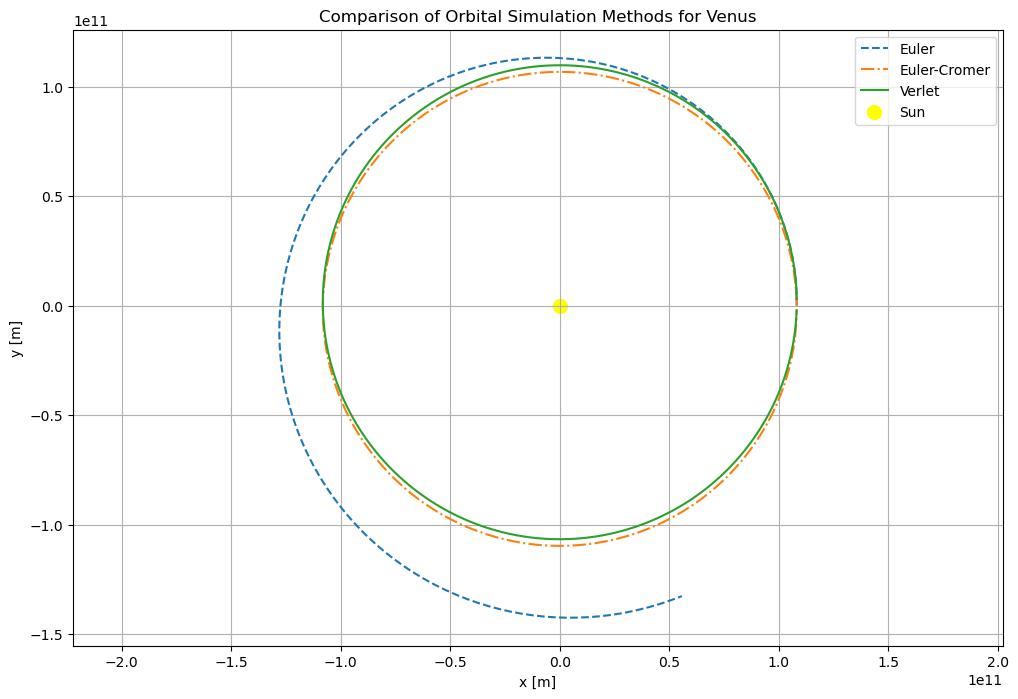

In [2]:
#Assignment1b.py
# %%
# import numpy as np
# import matplotlib.pyplot as plt
# import time

# # Constants
# G = 6.67408e-11  # Gravitational constant, N-m2/kg2
# M_sun = 1.989e+30  # Sun's mass, kg
# M_venus = 4.8675e+24  # Venus' mass, kg
# initial_distance = 108.21e9  # Initial distance to Venus at perihelion, m
# initial_velocity = 35.02e3  # Initial velocity of Venus, m/s
# one_venus_year = 225 * 24 * 3600  # Venus' orbital period in seconds

# # Initial conditions
# r_venus = np.array([initial_distance, 0])  # Initial position (perihelion)
# v_venus = np.array([0, initial_velocity])  # Initial velocity of Venus

# # Define gravitational force function
# def gravitational_force(m1, m2, r):
#     return -G * m1 * m2 / np.linalg.norm(r)**3 * r

# # Define integration methods
# def euler(r, v, dt):
#     f = gravitational_force(M_sun, M_venus, r)
#     r_next = r + v * dt
#     v_next = v + f / M_venus * dt
#     return r_next, v_next

# def euler_cromer(r, v, dt):
#     f = gravitational_force(M_sun, M_venus, r)
#     v_next = v + f / M_venus * dt
#     r_next = r + v_next * dt
#     return r_next, v_next

# def verlet(r, old_r, dt):
#     f = gravitational_force(M_sun, M_venus, r)
#     new_acc = f / M_venus
#     new_r = 2 * r - old_r + new_acc * dt**2
#     return new_r, r

# # Function to simulate orbit and calculate period
# def simulate_orbit(method, dt):
#     start_time = time.time()  # Record start time
#     r = r_venus.copy()
#     v = v_venus.copy()
#     positions = [r.copy()]
#     period_estimate = 0

#     while period_estimate < one_venus_year:
#         if method == 'euler':
#             r, v = euler(r, v, dt)
#         elif method == 'euler_cromer':
#             r, v = euler_cromer(r, v, dt)
#         elif method == 'verlet':
#             r, old_r = positions[-1], positions[-2]
#             r, v = verlet(r, old_r, dt)
#         positions.append(r.copy())
#         period_estimate += dt

#     end_time = time.time()  # Record end time
#     elapsed_time = end_time - start_time  # Calculate elapsed time
#     return np.array(positions), period_estimate, elapsed_time

# # Function to calculate period from positions
# def calculate_period_from_positions(positions, dt):
#     dx = positions[1:, 0] - positions[:-1, 0]
#     sign_changes = np.where(np.diff(np.signbit(dx)))[0]
#     if len(sign_changes) >= 2:
#         return sign_changes[1] * dt  # Second sign change as period estimate
#     else:
#         return -1  # Invalid period estimate

# # Function to determine maximum timestep with desired accuracy
# def determine_maximum_timestep(method):
#     initial_dt = 86400  # One day in seconds
#     timestep = initial_dt
#     relative_error = 1  # Initialized to 100%
#     while relative_error > 0.01:
#         positions, _, _ = simulate_orbit(method, timestep)
#         period_estimate = calculate_period_from_positions(positions, timestep)
#         relative_error = abs((period_estimate - one_venus_year) / one_venus_year)
#         if relative_error > 0.01:
#             timestep /= 2
#     return timestep

# # Determine maximum timestep for each method
# start_time = time.time()  # Record start time
# timestep_euler = determine_maximum_timestep('euler')
# end_time = time.time()  # Record end time
# elapsed_time_euler = end_time - start_time  # Calculate elapsed time

# start_time = time.time()  # Record start time
# timestep_euler_cromer = determine_maximum_timestep('euler_cromer')
# end_time = time.time()  # Record end time
# elapsed_time_euler_cromer = end_time - start_time  # Calculate elapsed time

# start_time = time.time()  # Record start time
# timestep_verlet = determine_maximum_timestep('verlet')
# end_time = time.time()  # Record end time
# elapsed_time_verlet = end_time - start_time  # Calculate elapsed time

# print('Maximum Timestep (Euler):', timestep_euler)
# print('Elapsed Time (Euler):', elapsed_time_euler)

# print('Maximum Timestep (Euler-Cromer):', timestep_euler_cromer)
# print('Elapsed Time (Euler-Cromer):', elapsed_time_euler_cromer)

# print('Maximum Timestep (Verlet):', timestep_verlet)
# print('Elapsed Time (Verlet):', elapsed_time_verlet)



# %%
import numpy as np
import matplotlib.pyplot as plt

# Constants
G = 6.67408e-11  # Gravitational constant, N-m2/kg2
M_sun = 1.989e+30  # Sun's mass, kg
M_venus = 4.8675e+24  # Venus' mass, kg
initial_distance = 108.21e9  # Initial distance to Venus at perihelion, m
initial_velocity = 35.02e3  # Initial velocity of Venus, m/s

# Time span
one_venus_year = 225 * 24 * 3600  # in seconds

# Initial conditions
r_venus = np.array([initial_distance, 0])  # Initial position (perihelion)
v_venus = np.array([0, initial_velocity])  # Initial velocity

# Define gravitational force function
def gravitational_force(m1, m2, r):
    return -G * m1 * m2 / np.linalg.norm(r)**3 * r

# Define integration methods
def euler(r, v, dt):
    f = gravitational_force(M_sun, M_venus, r)
    r_next = r + v * dt
    v_next = v + f / M_venus * dt
    return r_next, v_next

def euler_cromer(r, v, dt):
    f = gravitational_force(M_sun, M_venus, r)
    v_next = v + f / M_venus * dt
    r_next = r + v_next * dt
    return r_next, v_next

def verlet(r, old_r, dt):
    f = gravitational_force(M_sun, M_venus, r)
    new_acc = f / M_venus
    new_r = 2 * r - old_r + new_acc * dt**2
    return new_r, r

# Simulation setup
dt = 86400  # One day in seconds
n_steps = int(one_venus_year / dt)

# Initialize arrays
positions_euler = [r_venus.copy()]
positions_cromer = [r_venus.copy()]
positions_verlet = [r_venus.copy(), r_venus + v_venus * dt]  # Starting positions for Verlet

velocities_euler = [v_venus.copy()]
velocities_cromer = [v_venus.copy()]

# Simulation loop
for i in range(1, n_steps):
    new_r_euler, new_v_euler = euler(positions_euler[-1], velocities_euler[-1], dt)
    positions_euler.append(new_r_euler)
    velocities_euler.append(new_v_euler)

    new_r_cromer, new_v_cromer = euler_cromer(positions_cromer[-1], velocities_cromer[-1], dt)
    positions_cromer.append(new_r_cromer)
    velocities_cromer.append(new_v_cromer)

    if i < n_steps - 1:  # Verlet needs the previous two positions to compute the next one
        new_r_verlet, old_r_verlet = verlet(positions_verlet[-1], positions_verlet[-2], dt)
        positions_verlet.append(new_r_verlet)

# Convert lists to numpy arrays for plotting
positions_euler = np.array(positions_euler)
positions_cromer = np.array(positions_cromer)
positions_verlet = np.array(positions_verlet)

# Plot the results
plt.figure(figsize=(12, 8))
plt.plot(positions_euler[:, 0], positions_euler[:, 1], label='Euler', linestyle='--')
plt.plot(positions_cromer[:, 0], positions_cromer[:, 1], label='Euler-Cromer', linestyle='-.')
plt.plot(positions_verlet[1:, 0], positions_verlet[1:, 1], label='Verlet', linestyle='-')
plt.scatter([0], [0], color='yellow', s=100, label='Sun')  # Sun's position
plt.title('Comparison of Orbital Simulation Methods for Venus')
plt.xlabel('x [m]')
plt.ylabel('y [m]')
plt.legend()
plt.grid(True)
plt.axis('equal')
plt.show()

# %%


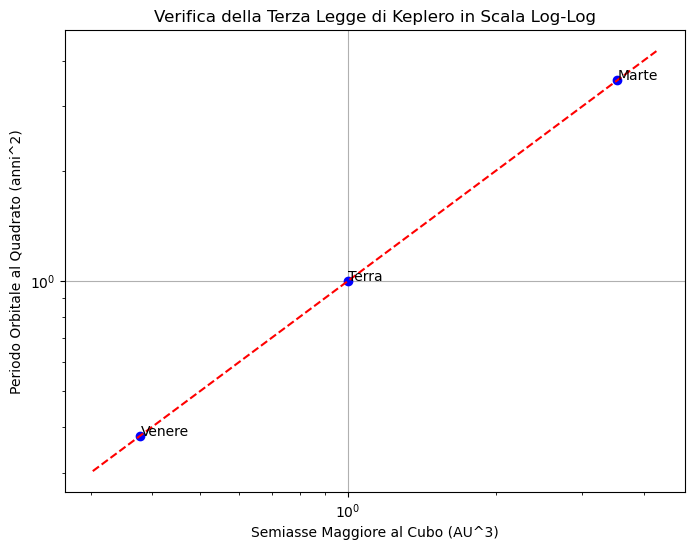

In [3]:
# %%
import numpy as np
import matplotlib.pyplot as plt

# Dati per Venere, Terra e Marte
data = {
    'Venere': {'T': 0.61519726, 'a': 0.723332},
    'Terra': {'T': 1.0, 'a': 1.0},
    'Marte': {'T': 1.8808158, 'a': 1.523662}
}

# Calcolare k per ciascun pianeta e preparare i dati per il grafico
T_squared = []
a_cubed = []
labels = []

for planet, values in data.items():
    T = values['T']
    a = values['a']
    T_squared.append(T**2)
    a_cubed.append(a**3)
    labels.append(planet)

# Convertire le liste in array NumPy per facilitare i calcoli e il plotting
T_squared = np.array(T_squared)
a_cubed = np.array(a_cubed)

# Creare un grafico log-log
plt.figure(figsize=(8, 6))
plt.loglog(a_cubed, T_squared, 'bo', base=10)  # Punti dei pianeti

# Aggiungere annotazioni ai punti
for i, label in enumerate(labels):
    plt.annotate(label, (a_cubed[i], T_squared[i]))

# Aggiungere una linea diagonale per rappresentare la relazione lineare attesa
# La linea ha una pendenza di 1 in scala log-log
x = np.linspace(min(a_cubed)*0.8, max(a_cubed)*1.2, 400)
plt.plot(x, x, 'r--')  # Linea rossa tratteggiata

# Etichette e titolo
plt.xlabel('Semiasse Maggiore al Cubo (AU^3)')
plt.ylabel('Periodo Orbitale al Quadrato (anni^2)')
plt.title('Verifica della Terza Legge di Keplero in Scala Log-Log')
plt.grid(True)
plt.show()

# %%
